In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## EDA

In [6]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

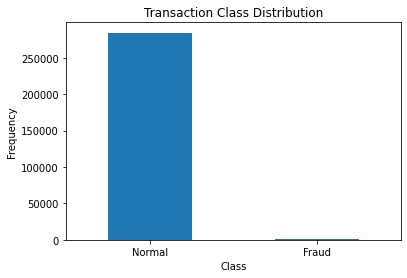

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')

In [8]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [9]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

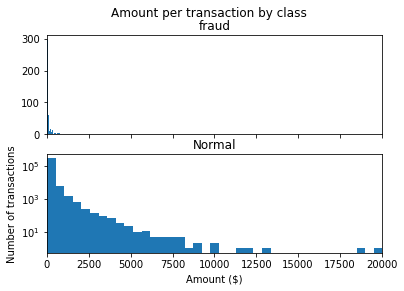

In [15]:
f, (ax1,ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

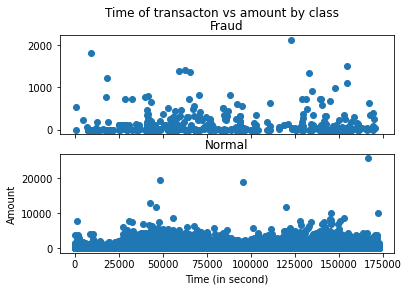

In [21]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle('Time of transacton vs amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in second)')
plt.ylabel('Amount')
plt.show()

In [22]:
df1 = df.sample(frac=0.1, random_state=1)
df1.shape

(28481, 31)

In [23]:
df.shape

(284807, 31)

In [28]:
Fraud = df1[df1['Class']==1]
Valid = df1[df1['Class']==0]
outlier_fraction = len(fraud)/float(len(Valid))

In [29]:
print(outlier_fraction)
print('Fraud cases : {}'.format(len(Fraud)))
print('Valid cases : {}'.format(len(Valid)))

0.01730444569499156
Fraud cases : 49
Valid cases : 28432


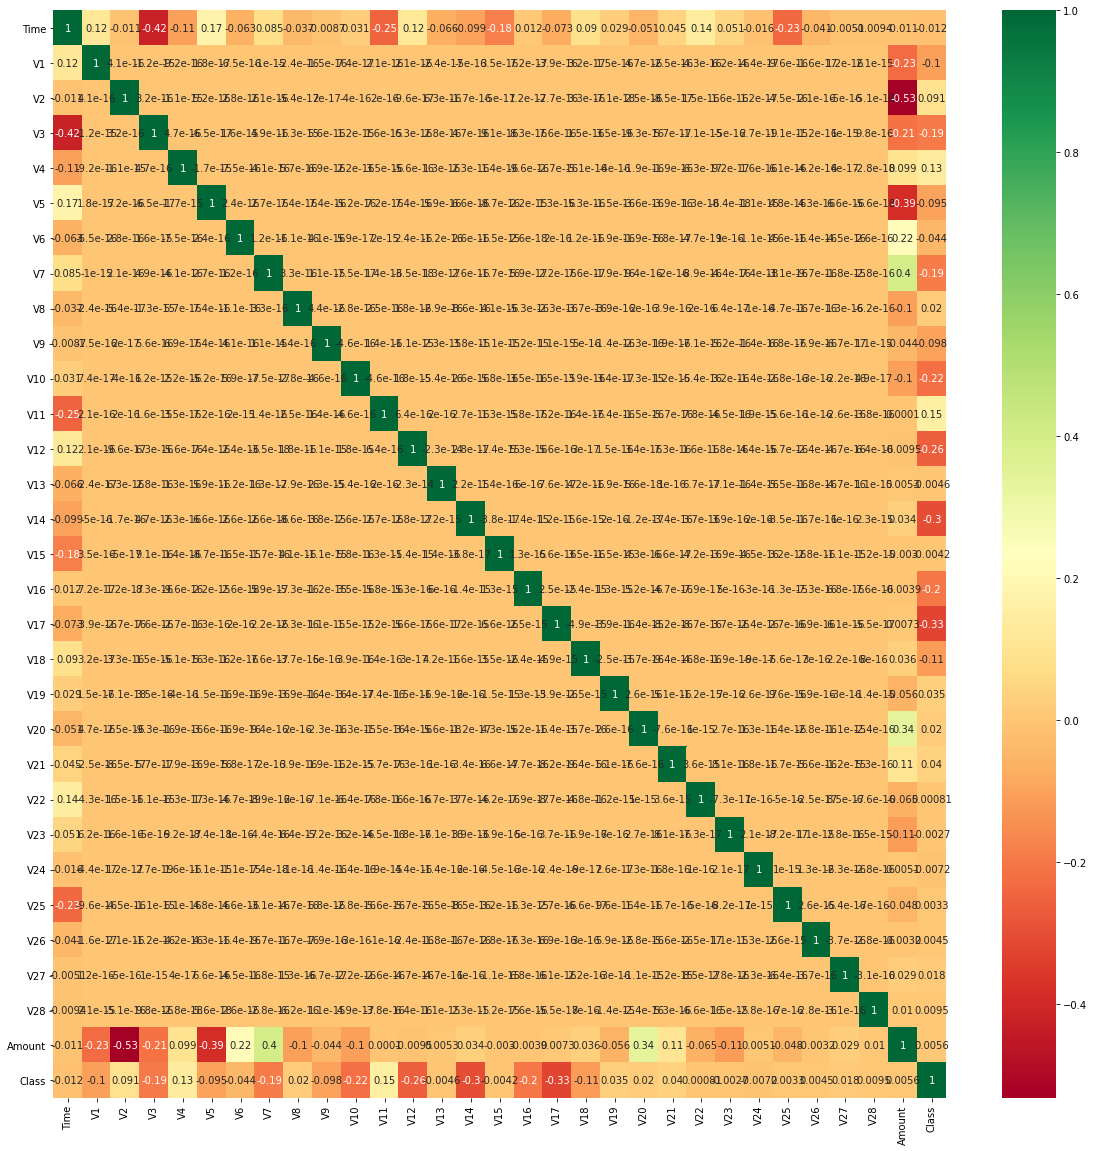

In [30]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [33]:
columns = df1.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
state = np.random.RandomState(42)
X = df1[columns]
Y = df1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### Logistic Regression

In [36]:
log = LogisticRegression()
log.fit(X,Y)
pred_log = log.predict(X)

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
print('Accuracy: ', round((accuracy_score(Y, pred_log)*100),2))

Accuracy:  99.87


In [39]:
print(classification_report(Y, pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.62      0.57      0.60        49

    accuracy                           1.00     28481
   macro avg       0.81      0.79      0.80     28481
weighted avg       1.00      1.00      1.00     28481



#### KNN

In [40]:
knn = KNeighborsClassifier()
knn.fit(X,Y)
pred_knn = knn.predict(X)

In [41]:
print('Accuracy: ', round((accuracy_score(Y, pred_knn)*100),2))

Accuracy:  99.83


In [42]:
print(classification_report(Y, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Machine (SVM)

In [43]:
svm = LinearSVC()
svm.fit(X,Y)
pred_svm = svm.predict(X)

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
print('Accuracy: ', round((accuracy_score(Y, pred_svm)*100),2))

Accuracy:  99.83


In [45]:
print(classification_report(Y, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X,Y)
pred_dt = dt.predict(X)

In [47]:
print('Accuracy: ', round((accuracy_score(Y, pred_dt)*100),2))

Accuracy:  100.0


In [48]:
print(classification_report(Y, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       1.00      1.00      1.00        49

    accuracy                           1.00     28481
   macro avg       1.00      1.00      1.00     28481
weighted avg       1.00      1.00      1.00     28481



#### Random Forest

In [49]:
rf = RandomForestClassifier()
rf.fit(X,Y)
pred_rf = rf.predict(X)

In [50]:
print('Accuracy: ', round((accuracy_score(Y, pred_rf)*100),2))

Accuracy:  100.0


In [52]:
print(classification_report(Y, pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       1.00      1.00      1.00        49

    accuracy                           1.00     28481
   macro avg       1.00      1.00      1.00     28481
weighted avg       1.00      1.00      1.00     28481



In [54]:
log_acc = round((accuracy_score(pred_log, Y)*100), 2)
dt_acc = round((accuracy_score(pred_dt, Y)*100), 2)
rf_acc = round((accuracy_score(pred_rf, Y)*100), 2)
svm_acc = round((accuracy_score(pred_svm, Y)*100), 2)

In [55]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM',],
                      'Score': [log_acc, dt_acc, rf_acc, svm_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,100.00
2,Random Forest,100.00
0,Logistic Regression,99.87
3,SVM,99.83
